# Gausian Boson Sampling 

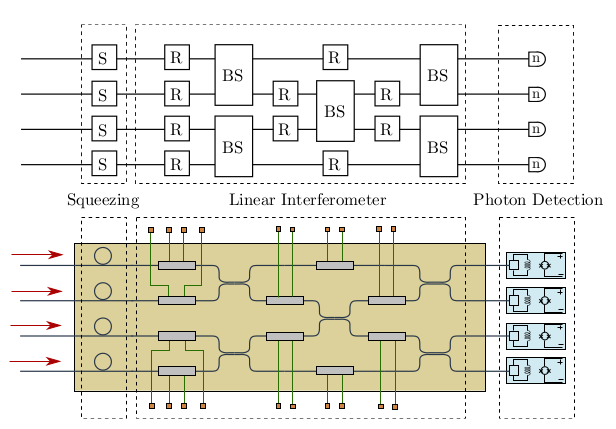


###### Applications of Near-Term Photonic Quantum Computers: Software and Algorithms, Thomas R. Bromley





##### Takagi-Autonne decomposition
### $$\boldsymbol{A}=\boldsymbol{U}\operatorname{diag}(\lambda_1,\lambda_2,\ldots,\lambda_m)\boldsymbol{U}^T$$






### $$\Pr(S)=\frac{1}{\sqrt{\det(Q)}}\frac{\operatorname{Haf}(\mathcal{A}_{S})}{s_{1}!s_{2}!\cdots s_{m}!}$$

##### Scott Aaronson and Alex Arkhipov. The computational complexity of linear optics. Theory of Computing, 9(1):143–252, 2013. doi:10.4086/toc.2013.v009a004.


$${\mathcal{A}}=A\oplus A^{*}$$

$$Q:=\Sigma+\mathbb{1}/2$$

$$\mathcal{A}:=X\left(\mathbb{1}-\boldsymbol{Q}^{-1}\right)$$


$$X = 
\begin{bmatrix}
0 & 1\\         
1 & 0
\end{bmatrix}$$

$$\left.\mathcal{A}=\left[\begin{array}{ccc|ccc}a_{1,1}&a_{1,2}&a_{1,3}&a_{1,4}&a_{1,5}&a_{1,6}\\a_{2,1}&a_{2,2}&a_{2,3}&a_{2,4}&a_{2,5}&a_{2,6}\\a_{3,1}&a_{3,2}&a_{3,3}&a_{3,4}&a_{3,5}&a_{3,6}\\\hline a_{4,1}&a_{4,2}&a_{4,3}&a_{4,4}&a_{4,5}&a_{4,6}\\a_{5,1}&a_{5,2}&a_{5,3}&a_{5,4}&a_{5,5}&a_{5,6}\\a_{6,1}&a_{6,2}&a_{6,3}&a_{6,4}&a_{6,5}&a_{6,6}\end{array}\right.\right]$$



$$S = (3, 0, 1)$$

$$\left.\boldsymbol{A}_S=\left[\begin{array}{cccc|cccc}a_{1,1}&a_{1,1}&a_{1,1}&a_{1,3}&a_{1,4}&a_{1,4}&a_{1,4}&a_{1,6}\\a_{1,1}&a_{1,1}&a_{1,1}&a_{1,3}&a_{1,4}&a_{1,4}&a_{1,4}&a_{1,6}\\a_{1,1}&a_{1,1}&a_{1,1}&a_{1,3}&a_{1,4}&a_{1,4}&a_{1,4}&a_{1,6} \\a_{3,1}&a_{3,1}&a_{3,1}&a_{3,3}&a_{3,4}&a_{3,4}&a_{3,4}&a_{3,6}\\\hline a_{4,1}&a_{4,1}&a_{4,1}&a_{4,3}&a_{4,4}&a_{4,4}&a_{4,4}&a_{4,6}\\a_{4,1}&a_{4,1}&a_{4,1}&a_{4,3}&a_{4,4}&a_{4,4}&a_{4,4}&a_{4,6}\\a_{4,1}&a_{4,1}&a_{4,1}&a_{4,3}&a_{4,4}&a_{4,4}&a_{4,4}&a_{4,6}\\a_{6,1}&a_{6,1}&a_{6,1}&a_{6,3}&a_{6,4}&a_{6,4}&a_{6,4}&a_{6,6}\end{array}\right.\right]$$

##### Exact simulation of Gaussian Boson Sampling in polynomial space and exponential time, Nicolás Quesada and Juan Miguel Arrazola


Ideally, a classical sampling algorithm for GBS will have the following properties: (i) sampling from the GBS distribution is exact, (ii) space complexity is polynomial, and (iii) time complexity is proportional to
the complexity of computing output probabilities. We
now describe an algorithm satisfying all these properties. The main strategy is to apply the definition of conditional probability

$$p(s_{k}|s_{k-1},\cdots,s_{1})=p(s_{k},s_{k-1},\cdots,s_{1})/p(s_{k-1},\cdots,s_{1})$$

to sequentially sample each mode conditioned on outcomes from previous
modes. When sampling the k-th mode, the probability

$$p(s_{k},s_{k-1},\cdots,s_{1})$$

can be calculated from the reduced
state of the first k modes, which can be efficiently computed for Gaussian states. This in turn involves calculating the hafnian of a matrix whose size depends on
the number of photons detected so far. The probability

$$p(s_{k-1},\cdots,s_{1})$$

Formally, let $\Sigma^{(k)}$ denote the reduced covariance matrix of the first k modes; this is simply the submatrix
of V obtained by keeping rows and columns 1 to k and m + 1 to m + k.

The probability of observing a partial pattern $S^{(k)}=(s_{1},s_{2},\ldots,s_{k})$

$$p(S^{(k)})=\frac{1}{\sqrt{\det(\boldsymbol{Q}^{(k)})}}\frac{\operatorname{Haf}\left(\boldsymbol{A}_{s}^{(k)}\right)}{s_{1}!\ldots s_{k}!}$$

##### A. Barvinok, Random Structures & Algorithms 14, 29 (1999).

Let $\boldsymbol{G}$ be a skew-symmetric random matrix whose entries above the main diagonal are drawn from the standard normal distribution $\mathcal{N}(0,1)$. Defining a matrix $\boldsymbol{W}$ with entries $W_{ij}=G_{ij}\sqrt{a_{ij}}$, it holds that
$$\operatorname{Haf}(\boldsymbol{A})=\mathbb{E}[\det(\boldsymbol{W})]$$







##### C. D. Godsil and I. Gutman, On the matching polynomial of a graph (University of Melbourne, 1978).

Let $\boldsymbol{G}$ be a skew-symmetric random matrix whose entries above the main diagonal are drawn -1 or +1 with equal probabilites. Defining a matrix $\boldsymbol{W}$ with entries $W_{ij}=G_{ij}\sqrt{a_{ij}}$, it holds that
$$\operatorname{Haf}(\boldsymbol{A})=\mathbb{E}[\det(\boldsymbol{W})]$$

In [207]:
import numpy as np
import thewalrus as tw
import math
import networkx as nx
from strawberryfields.apps import plot
import pandas as pd

from strawberryfields.apps import sample
from strawberryfields.apps import data
from strawberryfields.apps import plot

import matplotlib.pyplot as plt


In [208]:
def GG_hafnian(A):

    n = 1000
    d = A.shape[0]
    G_det = 0

    for _ in range(n):

        X = np.zeros((d, d))

        for i in range(d):
            for j in range(i,d):

                if i == j:
                    X[i][j] = 0
                else:
                    X[i][j] = np.random.choice([-1, 1], 1, p=[1 / 2, 1 / 2])
        X = X - X.T

        G_det += np.linalg.det(np.multiply(A**(1 / 2),X))

    return G_det / n

    

def B_hafnian(A):

    n = 1000
    d = A.shape[0]
    G_det = 0

    for _ in range(n):

        X = np.zeros((d, d))

        for i in range(d):
            for j in range(i,d):

                if i == j:
                    X[i][j] = 0
                else:

                    X[i][j] = np.random.normal(0, 1, 1)
                    
        X = X - X.T

        G_det += np.linalg.det(np.multiply(A**(1 / 2),X))

    return G_det / n


def reduce(A, outcome):

    y = np.zeros(0, dtype='int')
    for i, n_i in enumerate(outcome):
        y = np.concatenate((y, np.ones(n_i, dtype='int') * i))

    for i, n_i in enumerate(outcome):

        y = np.concatenate((y, np.ones(n_i, dtype='int') * (i + outcome.shape[0])))

    return A[y][:,y]   
    

def prob(A, det_Q, outcome):

    A_s =  reduce(A, outcome)

    fac = 1
    for i in outcome:
        fac *= math.factorial(i)

    h = GG_hafnian(A_s)
    
    p = (1 / (det_Q)**(1 / 2) ) * np.real(h) / fac

    return p

In [209]:
m = 6 # number of modes
n_max = 1 # max number of photons detected in one mode

nodes = m


A = np.array([[0, 1, 1, 0, 0, 1],
              [1, 0, 1, 1, 0, 0],
              [1, 1, 0, 1, 0, 0],
              [0, 1, 1, 0, 1, 0],
              [0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 1, 0]]) 


g = nx.Graph(A)
plot.graph(g)


# A = nx.random_regular_graph(3,nodes)
# nx.draw(A)
# A = nx.to_numpy_array(A)

# direct sum
A_p = np.zeros( np.add(A.shape,A.shape) )
A_p[:A.shape[0] , :A.shape[1]] = A
A_p[A.shape[0]: , A.shape[1]:] = A.conj()


A_p = A_p  / (2 * np.linalg.norm(A))

x = np.array([[0, 1], [1, 0]])
X = np.kron(x, np.eye(int(m)))
Q = np.linalg.inv(np.eye(int(2 * m)) - np.linalg.inv(X) @ A_p)


cov = Q - 1 / 2 * np.eye(2 * m)


In [217]:
elements = [i for i in range(n_max + 1)]  # elementary outcomes

outcome_array_total = np.array([])

n_samples = 1000

for t in range(n_samples):

    outcome_array = np.array([], dtype=int)

    modes = np.zeros(m, dtype=int)

    for i in range(m):  # run modes
        
        modes[i] = 1

        V_k = reduce(cov, modes)

        Q_k = V_k + 1 / 2 * np.eye(int(V_k.shape[0]))

        O_k = np.eye(int(V_k.shape[0])) - np.linalg.inv(Q_k)

        A_k = np.kron(np.array([[0, 1], [1, 0]]), np.eye(int(V_k.shape[0] / 2))) @ O_k

        A_k = np.multiply(A_k, (A_k > 1e-16).astype(int))

        det_Q = np.linalg.det(Q_k)

        p_array = np.array([])

        if i == 0:

            for j in elements: # run elementary outcomes

                tmp_outcome_array = np.array([j])

                if j == 0:
                    p_array = np.append(p_array, 1 / (det_Q)**(1 / 2))
                else:
                    p_array = np.append(p_array, prob(A_k, det_Q, tmp_outcome_array))

            with open('/home/dima/notebook/GBS/data/prob_array.csv', 'wb') as f:
                np.save(f, np.real(p_array / np.sum(p_array)))

        else:

            with open('/home/dima/notebook/GBS/data/prob_array.csv', 'rb') as f:
                last_p_array = np.load(f)

            print(last_p_array)

            outcome = np.random.choice(elements, 1, p=last_p_array)

            p_outcome = last_p_array[outcome]

            outcome_array = np.append(outcome_array, outcome)


            for j in elements:

                tmp_outcome_array = outcome_array
                tmp_outcome_array = np.append(tmp_outcome_array, j)

                p_array = np.append(p_array, prob(A_k, det_Q, tmp_outcome_array)  / p_outcome) # haf func

            with open('/home/dima/notebook/GBS/data/prob_array.csv', 'wb') as f:
                np.save(f, np.real(p_array / np.sum(p_array)))

            print(outcome_array)

    with open('/home/dima/notebook/GBS/data/prob_array.csv', 'rb') as f:
        last_p_array = np.load(f)

    print(last_p_array)

    outcome = np.random.choice(elements, 1, p=last_p_array)

    p_outcome = last_p_array[outcome]

    outcome_array = np.append(outcome_array, outcome)

    print(outcome_array)

    if t == 0:
        outcome_array_total = outcome_array

    else:
        outcome_array_total = np.vstack((outcome_array_total, outcome_array))


print(outcome_array_total)

with open('/home/dima/notebook/GBS/data/outcomes_'+str(n_max)+'.csv', 'wb') as f:
    np.save(f, outcome_array_total)


/tmp/ipykernel_12031/3135368395.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



[0.95354689 0.04645311]
[0]
[0.96898263 0.03101737]
[0 0]
[0.98437112 0.01562888]
[0 0 0]
[0.984375 0.015625]
[0 0 0 0]
[0.98461538 0.01538462]
[0 0 0 0 0]
[1. 0.]
[0 0 0 0 0 0]
[0.95354689 0.04645311]
[0]
[0.96898263 0.03101737]
[0 0]
[0.98437112 0.01562888]
[0 0 0]
[0.984375 0.015625]
[0 0 0 0]
[0.98461538 0.01538462]
[0 0 0 0 0]
[1. 0.]
[0 0 0 0 0 0]
[0.95354689 0.04645311]
[0]
[0.96898263 0.03101737]
[0 0]
[0.98437112 0.01562888]
[0 0 0]
[0.984375 0.015625]
[0 0 0 0]
[0.98461538 0.01538462]
[0 0 0 0 0]
[1. 0.]
[0 0 0 0 0 0]
[0.95354689 0.04645311]
[0]
[0.96898263 0.03101737]
[0 0]
[0.98437112 0.01562888]
[0 0 0]
[0.984375 0.015625]
[0 0 0 0]
[0.98461538 0.01538462]
[0 0 0 0 0]
[1. 0.]
[0 0 0 0 0 0]
[0.95354689 0.04645311]
[0]
[0.96898263 0.03101737]
[0 0]
[0.98437112 0.01562888]
[0 0 0]
[0.984375 0.015625]
[0 0 0 0]
[0.98461538 0.01538462]
[0 0 0 0 0]
[1. 0.]
[0 0 0 0 0 0]
[0.95354689 0.04645311]
[0]
[0.96898263 0.03101737]
[0 0]
[0.98437112 0.01562888]
[0 0 0]
[0.984375 0.015625]


In [216]:
outcome_array_total

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# GG estimator

In [213]:
non_zero_samples = np.array(outcome_array_total)

non_zero_samples = np.array([0] * m)

for i in range(outcome_array_total.shape[0]):

    if np.any(outcome_array_total[i] != [0] * m):

        non_zero_samples = np.vstack((non_zero_samples, outcome_array_total[i]))


In [214]:
maximum = 0
for j in range(m):
    maximum += 2**j
    
measuments = [bin(i)[2:] for i in range(maximum + 1)]


In [215]:

probability = np.zeros([maximum + 1])
for sample in non_zero_samples:
    n = 0
    t = 0
    for i in sample[-1::-1]:
        n += i * 2**t
        t += 1
    probability[n] += 1

probability /= n_samples


IndexError: invalid index to scalar variable.

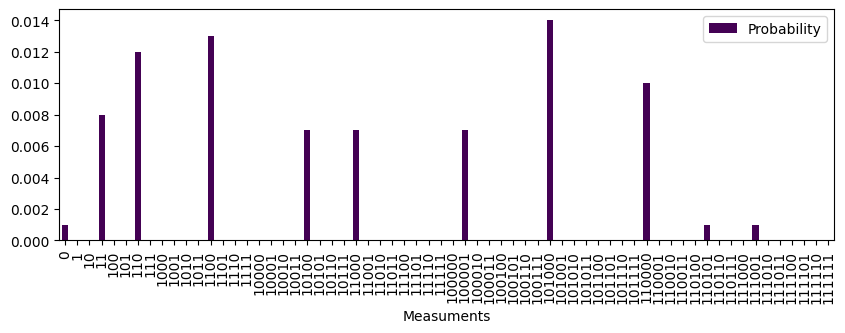

In [167]:
pr_dict = {'Measuments' : measuments,
              'Probability' : probability}
data = pd.DataFrame(pr_dict)

data.plot(kind='bar', x='Measuments', colormap = 'viridis', figsize=(10, 3));


# Variance

In [182]:
n_inst = 100
B_hafnian_array_std = np.array([])
GG_hafnian_array_std = np.array([])


for i in range(n_inst):

    A = nx.random_regular_graph(3, 6)
    A = nx.to_numpy_array(A)

    B_hafnian_array = np.array([])
    GG_hafnian_array = np.array([])

    for i in range(100): 
        B_hafnian_array = np.append(B_hafnian_array, B_hafnian(A))
        GG_hafnian_array = np.append(GG_hafnian_array, GG_hafnian(A))

    B_hafnian_array_std = np.append(B_hafnian_array_std, B_hafnian_array.std())
    GG_hafnian_array_std = np.append(GG_hafnian_array_std, GG_hafnian_array.std())



/tmp/ipykernel_12031/2140623702.py:45: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_12031/2140623702.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



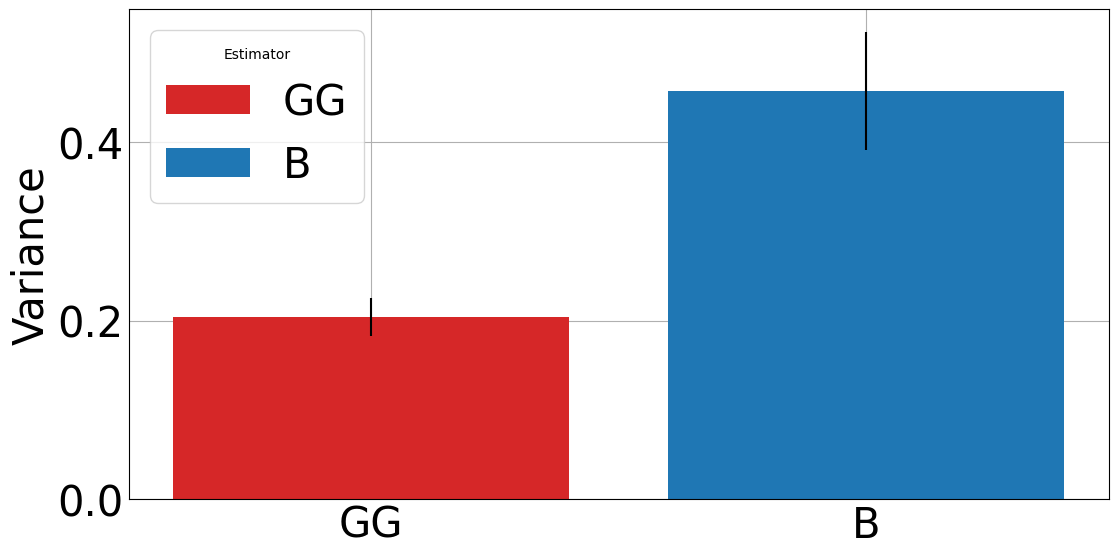

In [206]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,5))

est = ['GG', 'B']
counts = [GG_hafnian_array_std.mean(), B_hafnian_array_std.mean()]
bar_labels = ['GG', 'B']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(est, counts, label=bar_labels, color=bar_colors, yerr=[GG_hafnian_array_std.std(), B_hafnian_array_std.std()])

ax.set_ylabel('Variance', fontsize = 30)
# ax.set_title('Fruit supply by kind and color')
ax.legend(title='Estimator', fontsize = 30)




ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

plt.show()

